<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import sys
!{sys.executable} -m pip install numpy pandas
!pip install requests pandas

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import requests
import pandas as pd
import io   # <-- Import the missing module here



This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)
data = pd.read_csv(io.StringIO(response.text))

In [6]:
data.head(15)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [7]:
data.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
85,86,2020-09-03,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1


In [8]:
# subset1 = data[0:0]
# print(subset1)

In [9]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(io.StringIO(response2.text))
print(type(X))
feature_names = X.columns.tolist()

<class 'pandas.core.frame.DataFrame'>


In [10]:
print(feature_names)

['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034', 'Serial_B1035', 'Serial_B1036', 'Ser

In [11]:
X.head(-5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,81.0,15400.000000,3.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
81,82.0,3880.000000,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
82,83.0,6104.959412,2.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
83,84.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [12]:


# # Example DataFrame
# df = pd.DataFrame({
#     'A': [1, 2, 3],
#     'B': [4, 5, 6],
#     'C': [7, 8, 9]
# })

# # Get column names as a list
# feature_names = df.columns.tolist()
# print(feature_names)  # ['A', 'B', 'C']


In [13]:
# subset = X[0]
# print(subset)


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [14]:
# Ensure the column is a Pandas Series (using only one bracket)
Y_series = data['Class']

# Convert the Pandas Series to a NumPy array
Y = Y_series.to_numpy()


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [15]:
# students get this 
transform = preprocessing.StandardScaler()

transform.fit(X)

# Standardize the data using the transform object and reassign to X
X = transform.transform(X)


In [16]:
# prodict_Flight_1 = X[0]
# print(prodict_Flight_1)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [17]:

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


we can see we only have 18 test samples.


In [18]:
Y_test.shape

(18,)

In [19]:
X_test.shape

(18, 83)

In [20]:
print(X_test)

[[ 0.13472338 -1.23271672 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 [ 1.25100281  1.99100483  1.83279796 ...  1.19684269 -0.51730613
   0.51730613]
 [ 1.40497238 -0.47658801 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 ...
 [-0.6351245  -0.17242292  0.17499076 ...  1.19684269 -0.51730613
   0.51730613]
 [-1.2894952  -0.79467615 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 [-0.82758647 -0.32236346 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]]


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
# Step 1: Create a Logistic Regression object
logreg = LogisticRegression(max_iter=10000)  # Setting a higher max_iter just in case of convergence issues

# Step 2: Define the parameter grid

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Step 3: Create the GridSearchCV object
logreg_cv = GridSearchCV(logreg, parameters, cv=10)

# Step 4: Fit the GridSearchCV object to the data
logreg_cv.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters found: ", logreg_cv.best_params_)


Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [22]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [23]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("logreg_accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
logreg_accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:

# Calculate accuracy on the test data using the best model found by GridSearchCV
logreg_accuracy = logreg_cv.best_estimator_.score(X_test, Y_test)
logreg_accuracy2=logreg_cv.best_score_
print(f"logreg_accuracy: {logreg_accuracy * 100:.2f}%")


logreg_accuracy: 83.33%


Lets look at the confusion matrix:


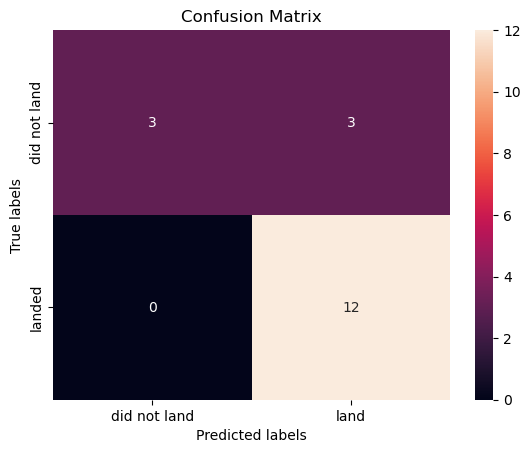

In [25]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
# parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
#               'C': np.logspace(-3, 3, 5),
#               'gamma':np.logspace(-3, 3, 5)}
# svm = SVC()

In [27]:
# Given parameters for the grid search
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a Support Vector Machine object
svm = SVC()

# Create a GridSearchCV object with 10-fold cross validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Assuming X_train and y_train are your data, fit the GridSearchCV object to the data
svm_cv.fit(X_train, Y_train)

# After fitting, you can get the best parameters using:
best_params = svm_cv.best_params_
print("Best parameters:", best_params)


Best parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}


In [28]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [29]:
#svm_accuracy = svm_cv.score(X_test, Y_test)

svm_accuracy = svm_cv.best_estimator_.score(X_test, Y_test)
svm_accuracy2=svm_cv.best_score_
print(f"svm_accuracy on the test data: {svm_accuracy:.2f}")

svm_accuracy on the test data: 0.83


We can plot the confusion matrix


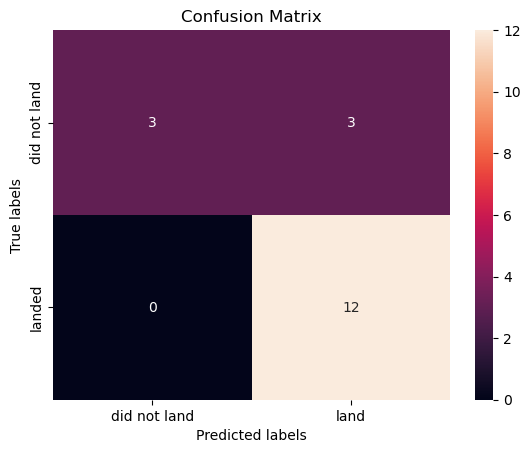

In [30]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [31]:
# parameters = {'criterion': ['gini', 'entropy'],
#      'splitter': ['best', 'random'],
#      'max_depth': [2*n for n in range(1,10)],
#      'max_features': ['auto', 'sqrt'],
#      'min_samples_leaf': [1, 2, 4],
#      'min_samples_split': [2, 5, 10]}

# tree = DecisionTreeClassifier()

In [32]:
# Given parameters for the grid search
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier(max_depth=3)
#tree = DecisionTreeClassifier()
# Create a GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

tree_cv.fit(X_train, Y_train)

tree_cv.best_params = tree_cv.best_params_





In [33]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8910714285714285


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [34]:
#tree_accuracy = tree_cv.score(X_test, Y_test)
tree_accuracy = tree_cv.best_estimator_.score(X_test, Y_test)
tree_accuracy2=tree_cv.best_score_
print(f"tree_accuracy on the test data: {tree_accuracy:.2f}")

tree_accuracy on the test data: 0.83


We can plot the confusion matrix


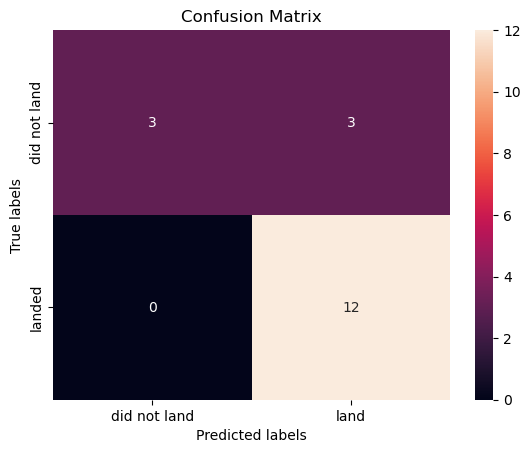

In [35]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [36]:
# parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'p': [1,2]}

# KNN = KNeighborsClassifier()

In [37]:
# Given parameters for the grid search
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a k nearest neighbors object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

knn_cv.fit(X_train, Y_train)

knn_cv.best_params = knn_cv.best_params_


In [38]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [39]:
#knn_accuracy = knn_cv.score(X_test, Y_test)
knn_accuracy = knn_cv.best_estimator_.score(X_test, Y_test)
knn_accuracy2=knn_cv.best_score_
print(f"knn_accuracy on the test data: {knn_accuracy:.2f}")

knn_accuracy on the test data: 0.83


We can plot the confusion matrix


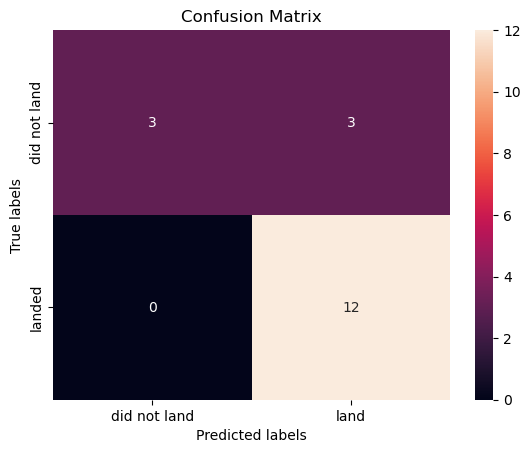

In [40]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [41]:
print(logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy)


0.8333333333333334 0.8333333333333334 0.8333333333333334 0.8333333333333334


In [42]:
print(logreg_accuracy2, svm_accuracy2, tree_accuracy2, knn_accuracy2)

0.8464285714285713 0.8482142857142856 0.8910714285714285 0.8482142857142858


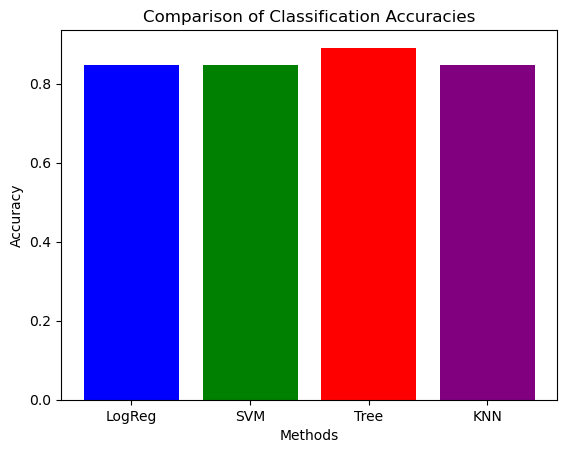

In [43]:
import matplotlib.pyplot as plt

# Sample data
methods = ['LogReg', 'SVM', 'Tree', 'KNN']
accuracies = [logreg_accuracy2, svm_accuracy2, tree_accuracy2, knn_accuracy2]

# Create bar chart
plt.bar(methods, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Accuracies')
plt.show()


In [44]:
# # Compare the accuracies
# best_accuracy = max(logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy)

# if best_accuracy == svm_accuracy:
#     print("SVM is the best classifier with an accuracy of", svm_accuracy)
# elif best_accuracy == tree_accuracy:
#     print("Decision Tree is the best classifier with an accuracy of", tree_accuracy)
    
# elif best_accuracy == logreg_accuracy:
#     print("logreg is the best classifier with an accuracy of", logreg_accuracy)   
    
    
# else:
#     print("KNN is the best classifier with an accuracy of", knn_accuracy)


In [45]:
# Compare the accuracies 2
best_accuracy2 = max(logreg_accuracy2, svm_accuracy2, tree_accuracy2, knn_accuracy2)

if best_accuracy2 == svm_accuracy2:
    print("SVM is the best classifier with an accuracy of", svm_accuracy2)
elif best_accuracy2 == tree_accuracy2:
    print("Decision Tree is the best classifier with an accuracy of", tree_accuracy2)
    
elif best_accuracy2 == logreg_accuracy2:
    print("logreg is the best classifier with an accuracy of", logreg_accuracy2)   
    
    
else:
    print("KNN2 is the best classifier with an accuracy of", knn_accuracy2)


Decision Tree is the best classifier with an accuracy of 0.8910714285714285


In [46]:
best_tree = tree_cv.best_estimator_


In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#feature_names = X.columns.tolist() (moved to just after defined X)


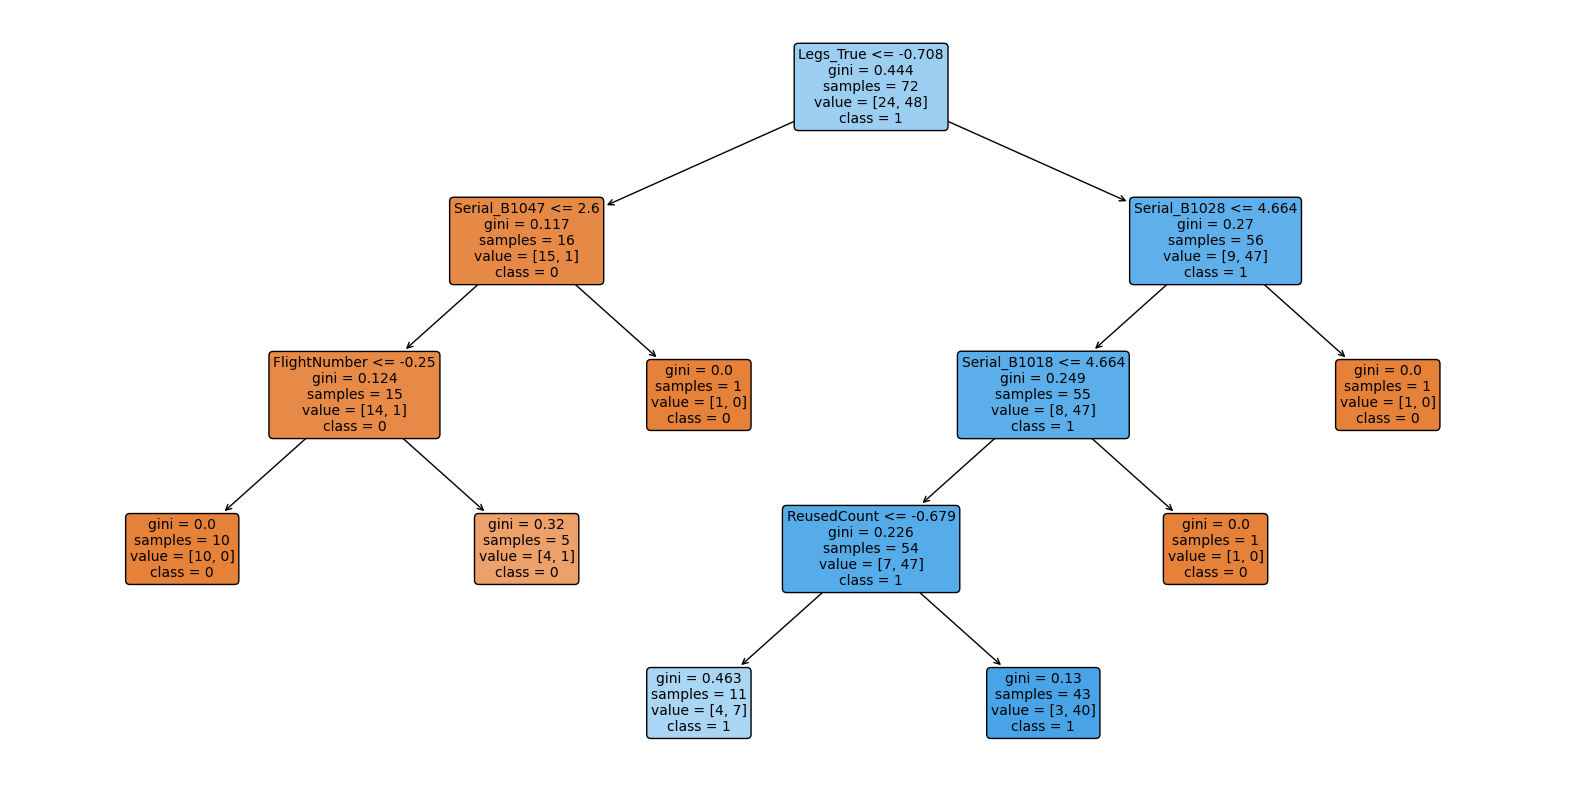

In [48]:
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=feature_names, class_names=[str(cls) for cls in best_tree.classes_], rounded=True, max_depth=5, fontsize=10)
plt.show()


In [49]:
row_87_df = X.iloc[[86]]
print(row_87_df)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
prodict_row1=X.iloc[0:]
# reshaped_prodict_row1 = prodict_row1.reshape(1, -1)
# print(reshaped_prodict_row1)

In [ ]:
print(prodict_row1)

In [ ]:
predicted_values = tree_cv.predict(reshaped_prodict_row1)
print(predicted_values)

In [ ]:
predicted_probabilities = tree_cv.predict_proba(reshaped_prodict_row1)
print(predicted_probabilities)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
